lambda x, y, t: y - (x[0] + x[1]*t[0] + x[2]*t[1] + x[3]*t[0]**2 + x[4]*t[0]*t[1] + x[5]*t[1]**2 + x[6]*t[0]**3 + x[7]*t[0]**2*t[1] + x[8]*t[0]*t[1]**2 + x[9]*t[1]**3 + x[10]*t[0]**4 + x[11]*t[0]**3*t[1] + x[12]*t[0]**2*t[1]**2 + x[13]*t[0]*t[1]**3 + x[14]*t[1]**4)
numpy time:0.0019145011901855469, residual:[ 57.78786225]
scipy time:0.20354795455932617, residual:28.893931126863812


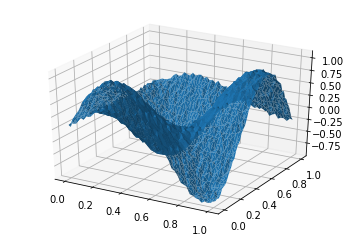

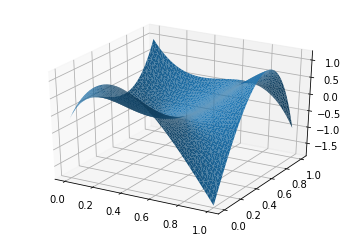

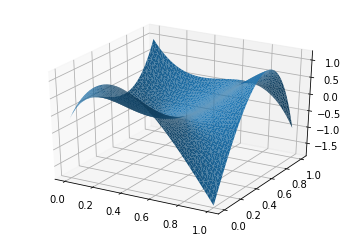

In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import psf_interpolation_utils as utils
import tf_pixelwise_interpolation as tf_pixelwise
from imp import reload
from time import time

reload(utils)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y, copy=False)
# Z = X**2 + Y**2 + np.random.rand(*X.shape)*0.01
# Z = X**2 + Y**2
Z = np.sin(5*X)*np.cos(5*Y) + np.random.rand(*X.shape)*0.1

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
ax.plot_trisurf(X, Y, Z)

order = 4
t0=time()
coeff, r = utils.poly_fit(X, Y, Z, order)
t1=time()
coeff_sci, r_sci = utils.poly_scipy_fit(X, Y, Z, order)
t2=time()
pred_Z = utils.poly_val_all(X, Y, coeff, order)
pred_sci_Z = utils.poly_val_all(X, Y, coeff_sci, order)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_Z)
print('numpy time:{}, residual:{}'.format(t1-t0, r))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_sci_Z)
print('scipy time:{}, residual:{}'.format(t2-t1, r_sci))

plt.show()

Step 0: loss = 0.00000 (0.023 sec)
Step 100: loss = 0.00001 (0.000 sec)
Step 200: loss = 0.00001 (0.000 sec)
Step 300: loss = 0.00001 (0.000 sec)
Step 400: loss = 0.00001 (0.000 sec)
Step 500: loss = 0.00001 (0.000 sec)
Step 600: loss = 0.00001 (0.000 sec)
Step 700: loss = 0.00001 (0.000 sec)
Step 800: loss = 0.00001 (0.000 sec)
Step 900: loss = 0.00000 (0.001 sec)
Training Data Eval:
  Num examples: 2000  Total loss: 0.000127783  Mean loss @ 1: 0.000000064
Validation Data Eval:
  Num examples: 2000  Total loss: 0.000178303  Mean loss @ 1: 0.000000089
Step 1000: loss = 0.00001 (0.001 sec)
Step 1100: loss = 0.00001 (0.000 sec)
Step 1200: loss = 0.00001 (0.000 sec)
Step 1300: loss = 0.00001 (0.000 sec)
Step 1400: loss = 0.00001 (0.000 sec)
Step 1500: loss = 0.00001 (0.000 sec)
Step 1600: loss = 0.00001 (0.000 sec)
Step 1700: loss = 0.00001 (0.000 sec)
Step 1800: loss = 0.00000 (0.000 sec)
Step 1900: loss = 0.00002 (0.000 sec)
Training Data Eval:
  Num examples: 2000  Total loss: 0.000123

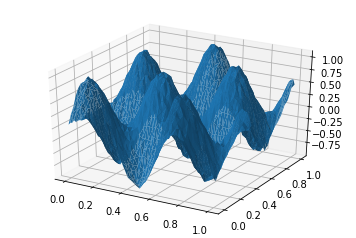

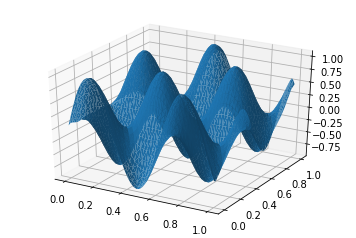

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import psf_interpolation_utils as utils
import psf_interpolation as psf_interpolation
import tf_pixelwise_interpolation as tf_pixelwise

my_psf = psf_interpolation.PSF_interpolation()
my_psf.interpolate(method='tf_pixelwise', learning_rate=0.01, hidden1=3, hidden2=6, pixel_num=0)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y, copy=False)
# Z = X**2 + Y**2 + np.random.rand(*X.shape)*0.01
# Z = X**2 + Y**2
Z = np.sin(10*X)*np.cos(10*Y) + np.random.rand(*X.shape)*0.1

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
order = 20
coeff, r = utils.poly_fit(X, Y, Z, order)
pred_Z = utils.poly_val_all(X, Y, coeff, order)

ax.plot_trisurf(X, Y, Z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, pred_Z)
print(r)
plt.show()

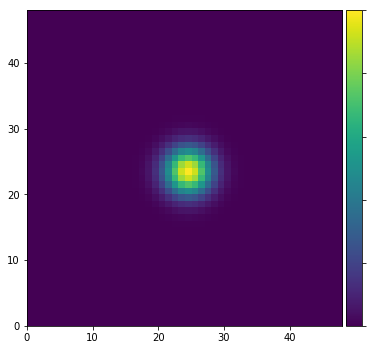

In [4]:
import psf_interpolation_utils as utils
import numpy as np
[psf_mesh_x, psf_mesh_y] = np.mgrid[0:48, 0:48]
psf_mesh_x = psf_mesh_x - 24
psf_mesh_y = psf_mesh_y - 24
utils.plot_stamp(stamp_data=np.exp(-(psf_mesh_x**2+psf_mesh_y**2)/(2*2.5**2)))

In [2]:
import numpy as np
b=np.array([[1,2],[3,4]])
a=[b,2*(b.copy()),3*(b.copy()),4*(b.copy())]
a=np.array(a)
print(a-b)

[[[ 0  0]
  [ 0  0]]

 [[ 1  2]
  [ 3  4]]

 [[ 2  4]
  [ 6  8]]

 [[ 3  6]
  [ 9 12]]]


In [31]:
from sympy import *
x, y, z, N, c0, c1, c2 = symbols('x, y, z, c0, c1, c2')
exp1 = c0 + c1*x + c2*y - z
print(exp1)

ValueError: not enough values to unpack (expected 7, got 6)

In [28]:
from sympy import *


def poly_sym_fun_sub(order):
#     coeff_sub is to keep track for coefficient subscripts
    coeff_sub = int((order+1)*order/2)
    result = "c{}*x**{} + ".format(coeff_sub, order)
    coeff_sub += 1
    for i in range(1, order):
        x_coef = order - i
        y_coef = i
        x_term = "x**{}".format(x_coef)
        y_term = "y**{}".format(y_coef)
        if x_coef == 1:
            x_term = "x"
        if y_coef == 1:
            y_term = "y"
        result += "c{}*{}*{} + ".format(coeff_sub, x_term, y_term)
        coeff_sub += 1
    result += "c{}*y**{}".format(coeff_sub, order)
    return result


def poly_sym_maker(order):
    diff_eq = 'c0 + c1*x + c2*y'
    for i in range(2, order+1):
        sub_poly_sym_eq = poly_sym_fun_sub(i)
        diff_eq += ' + {}'.format(sub_poly_sym_eq)
    diff_eq += ' - z'
    TERM_NUM = int((order + 2) * (order + 1) / 2)
    init = 'x, y, z, n'
    for i in range(TERM_NUM):
        init += ', c{}'.format(i)
    init = init + ' = ' + 'symbols(\'{}\')'.format(init)
#     print(init)
    exec(init, globals())
    
    coeff_mat = []
    coeff_vect = []
    for i in range(TERM_NUM):
        sub_coeffs = []
        temp_eq = eval('expand(diff(({})**2, c{}, 1)/2)'.format(diff_eq, i))
        if i == 0:
            temp_eq = (temp_eq-c0)+c0*n
        for i in range(TERM_NUM):
            exec('sub_coeffs.append(temp_eq.coeff(c{}))'.format(i))
#         print(temp_eq)
        coeff_mat.append(sub_coeffs)
        coeff_vect.append(-temp_eq.coeff(z))
    return coeff_mat, coeff_vect


def poly_sym_interpolation(self, order):
    TERM_NUM = int((order + 2) * (order + 1) / 2)
#     train_coord = []
#     t_z = []
#     for chip_psf_data in self.psf_data:
#         train_coord += [data[2:4] for data in chip_psf_data['chip_train_data']]
#         t_z += [data[4].ravel() for data in chip_psf_data['chip_train_data']]

    # for dev
    N = 20
    PIXEL_NUM = 2
    train_coord = [[i,i+0.2] for i in range(N)]
    t_z = [np.ones((PIXEL_NUM, PIXEL_NUM)).ravel()*i for i in range(N)]
    
    train_coord = np.array(train_coord)
    t_z = np.array(t_z)
    coeff_mat, coeff_vect = poly_sym_maker(order)
    coeff_mat_eval, coeff_vect_eval = np.zeros((TERM_NUM, TERM_NUM)), []
    # calculate linear interpolation coefficient matrices on train psf data
    t_x = train_coord[:, 0]
    t_y = train_coord[:, 1]
    t_n = np.ones(t_x.shape)
    
    for i in range(TERM_NUM):
        for j in range(TERM_NUM):
            term_func = sy.lambdify((x, y, n), coeff_mat[i][j], 'numpy')
            coeff_mat_eval[i,j] = np.sum(term_func(t_x, t_y, t_n))

    for i in range(TERM_NUM):
        term_func = sy.lambdify((x, y), coeff_vect[i], 'numpy')
        term_x_y = term_func(t_x, t_y)
        if isinstance(term_x_y, int):
            coeff_vect_eval.append(np.sum(t_z*term_x_y, axis=0))
        else:
            coeff_vect_eval.append(np.sum(t_z*term_x_y[:, np.newaxis], axis=0))
    coeff_vect_eval=np.array(coeff_vect_eval)
    inv_coeff_mat_eval = np.linalg.inv(coeff_mat_eval)
    coeff_vect_result = np.dot(inv_coeff_mat_eval, coeff_vect_eval)
    print(coeff_vect_result.shape)
    return
    

    coef_x_x = np.sum(t_x ** 2)
    coef_y_y = np.sum(t_y ** 2)
    coef_x_y = np.sum(t_x * t_y)
    coef_y_z, coef_z_x = np.zeros(t_z[0].shape), np.zeros(t_z[0].shape)
    for i in range(len(t_x)):
        coef_y_z += t_y[i] * t_z[i]
        coef_z_x += t_x[i] * t_z[i]
    coef_x = np.sum(t_x)
    coef_y = np.sum(t_y)
    coef_z = np.sum(t_z, axis=0)
    inv_coef = np.linalg.inv(np.array([[coef_x_x, coef_x_y, coef_x],
                                       [coef_x_y, coef_y_y, coef_y],
                                       [coef_x, coef_y, len(t_x)]]))
    opt_A, opt_B, opt_C = np.zeros(t_z[0].shape), np.zeros(t_z[0].shape), np.zeros(t_z[0].shape)
    coef_rhs = (coef_z_x, coef_y_z, coef_z)
    print(opt_A.shape)
    for i in range(3):
        opt_A += inv_coef[0, i] * coef_rhs[i]
        opt_B += inv_coef[1, i] * coef_rhs[i]
        opt_C += inv_coef[2, i] * coef_rhs[i]
    self.cal_info['poly1'] = [opt_A, opt_B, opt_C]

# poly_sym_maker(2)
poly_sym_interpolation(None, 2)
# result = poly_sym_maker(2)

(6, 4)


In [9]:
import numpy as np
t_x = np.arange(5)
t_y = np.array([t_x, t_x, t_x])
t_z = t_y
t_z = np.concatenate((t_z, t_y), axis=0)
print(t_z.shape)
# t_z = np.array([np.ones((2,2)).ravel()*i for i in range(10,15)])
# print(t_x)
# print(t_y)
# print(t_z)
# print(t_z*t_x[:, np.newaxis])
b=[]
a=np.array([[1],[2],[3],[4]])
for i in range(2):
    b.append(a.reshape(a.shape[0]))
b=np.array(b)
# print(b.shape)

(6, 5)


In [7]:
from sympy import *
import numpy as np
x, y, z, n, c0, c1, c2, c3, c4, c5 = symbols('x, y, z, n, c0, c1, c2, c3, c4, c5')
exp5 = c0*y**2 + c1*x*y**2 + c2*y**3 + c3*x**2*y**2 + c4*x*y**3 + c5*y**4 - y**2*z
train_coord = [[i,i+0.2] for i in range(10)]
train_coord = np.array(train_coord)
t_x = train_coord[:, 0]
t_y = train_coord[:, 1]
# print(exp5.coeff(c1).subs(x,t_x).subs(y,t_y).evalf())

In [4]:
import sympy as sy
import numpy as np    
from sympy.abc import x, y

z = ((x+y)**2).expand()
print(z)
# x**2 + 2*x*y + y**2
X = np.arange(6).reshape(2,3)
Y = np.arange(1,7).reshape(2,3)    
f = sy.lambdify((x, y), z, 'numpy')
print(f(X, Y))

x**2 + 2*x*y + y**2
[[  1   9  25]
 [ 49  81 121]]


In [2]:
import numpy as np  
i=2
coeff=np.array([0,1,2,3,4,5])
print(coeff[int((i+1)*i/2): int((i+2)*(i+1)/2)])

[3 4 5]


In [3]:
def poly_fun_sub(order):
    start = int((order+1)*order/2)
    result = "x[{}]*t[0]**{} + ".format(start, order)
    start += 1
    for i in range(1, order):
        x_coef = order - i
        y_coef = i
        x_term = "t[0]**{}".format(x_coef)
        y_term = "t[1]**{}".format(y_coef)
        if x_coef == 1:
            x_term = "t[0]"
        if y_coef == 1:
            y_term = "t[1]"
        result += "x[{}]*{}*{} + ".format(start, x_term, y_term)
        start += 1
    result += "x[{}]*t[1]**{}".format(start, order)
    return result


def poly_maker(order):
    result = 'lambda x, y, t: y - (x[0] + x[1]*t[0] + x[2]*t[1]'
    if order == 1:
        result += ')'
        return eval(result)
    for i in range(2, order+1):
        result += ' + {}'.format(poly_fun_sub(i))
    result += ')'
    print(result)
#     return eval(result)

poly_maker(2)

lambda x, y, t: y - (x[0] + x[1]*t[0] + x[2]*t[1] + x[3]*t[0]**2 + x[4]*t[0]*t[1] + x[5]*t[1]**2)


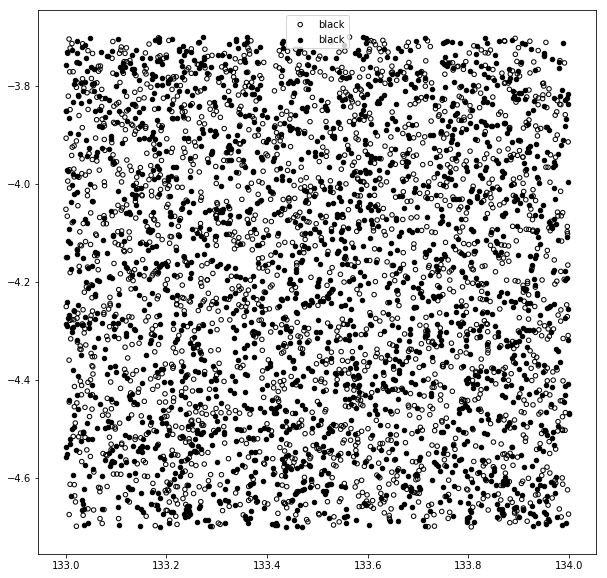

In [60]:
import matplotlib.pyplot as plt
from numpy.random import random


fig_size=[10, 10]
# plt.rcParams["figure.figsize"] = fig_size
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
for i in range(2):
    color = 'black'
    marker = 'o'
    scale = 20
    n = 2000
    x = [random() for j in range(n)]
    y = [random() for j in range(n)]
    x=np.array(x)
    y=np.array(y)
    x+=133
    y-=4.7
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none', marker=marker)
    if i==0:
        ax.scatter(x, y, edgecolors='black', s=scale, label=color, facecolors='none', marker=marker)
    else:
        ax.scatter(x, y, c='black', s=scale, label=color, marker=marker)
    
ax.legend()
plt.show()


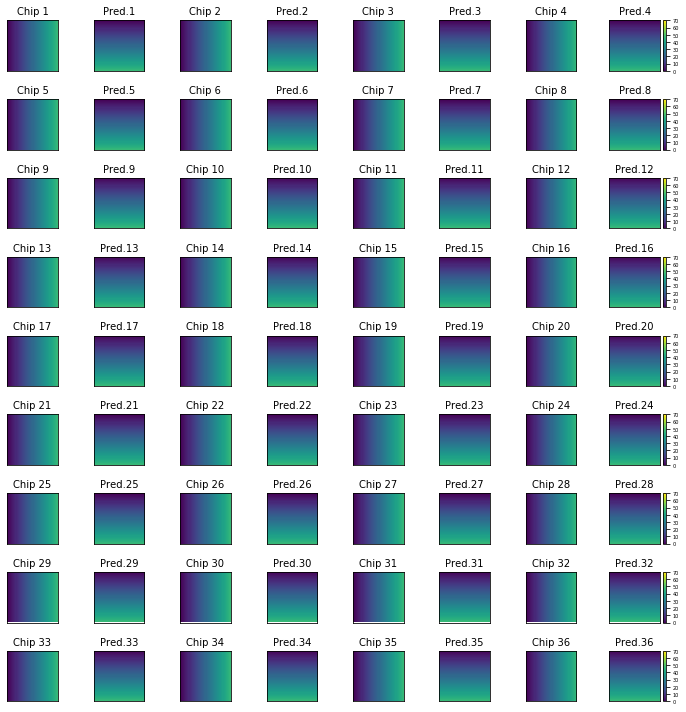

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import numpy as np
a=np.arange(48)
x,y=np.meshgrid(a,a)
plot_axes_extend=(0, 48, 0, 48)


gs = gridspec.GridSpec(9, 8, width_ratios=[1,1,1,1,1,1,1,1],height_ratios=[1,1,1,1,1,1,1,1,1])
plt.figure(figsize=(10, 10))
vmin=0
vmax=70

for i in range(36):
    left_grid_num=2*(i%4)
    right_grid_num=left_grid_num+1
    row_grid_num=i//4
    
    ax_orig = plt.subplot(gs[row_grid_num, left_grid_num])
    plt.title('Chip {}'.format(i+1),fontsize=10)
    fig = ax_orig.get_figure()
    im = ax_orig.imshow(x, vmin=vmin, vmax=vmax, extent=plot_axes_extend, interpolation="none")
    plt.setp(ax_orig.get_yticklabels(), visible=False)
    plt.setp(ax_orig.get_xticklabels(), visible=False)
    ax_orig.tick_params(axis=u'both', which=u'both',length=0)

    
    ax_met = plt.subplot(gs[row_grid_num, right_grid_num])
    plt.title('Pred.{}'.format(i+1),fontsize=10)
    fig = ax_met.get_figure()
    im = ax_met.imshow(y, vmin=vmin, vmax=vmax, extent=plot_axes_extend, interpolation="none")
    plt.setp(ax_met.get_yticklabels(), visible=False)
    plt.setp(ax_met.get_xticklabels(), visible=False)
    ax_met.tick_params(axis=u'both', which=u'both',length=0)
    
    if i%4 == 3:
        divider = make_axes_locatable(ax_met)
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        plt.colorbar(im, cax=ax_cb)
        ax_cb.yaxis.tick_right()
        ax_cb.yaxis.set_tick_params(labelsize=5)

fig=plt.gcf()
fig.tight_layout()
plt.show()